# <center>ElecTweets</center>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#To-Do-List" data-toc-modified-id="To-Do-List-1">To Do List</a></span></li><li><span><a href="#Import-des-Librairies" data-toc-modified-id="Import-des-Librairies-2">Import des Librairies</a></span></li><li><span><a href="#Paramètres" data-toc-modified-id="Paramètres-3">Paramètres</a></span></li><li><span><a href="#Import-du-Dataset" data-toc-modified-id="Import-du-Dataset-4">Import du Dataset</a></span></li><li><span><a href="#Exploration-et-Analyse-du-Dataset" data-toc-modified-id="Exploration-et-Analyse-du-Dataset-5">Exploration et Analyse du Dataset</a></span><ul class="toc-item"><li><span><a href="#sexe" data-toc-modified-id="sexe-5.1"><code>sexe</code></a></span></li><li><span><a href="#compte_verifie" data-toc-modified-id="compte_verifie-5.2"><code>compte_verifie</code></a></span></li><li><span><a href="#sortant" data-toc-modified-id="sortant-5.3"><code>sortant</code></a></span></li><li><span><a href="#dissident" data-toc-modified-id="dissident-5.4"><code>dissident</code></a></span></li><li><span><a href="#nb_tweets" data-toc-modified-id="nb_tweets-5.5"><code>nb_tweets</code></a></span></li><li><span><a href="#sum_likes" data-toc-modified-id="sum_likes-5.6"><code>sum_likes</code></a></span></li><li><span><a href="#max_likes" data-toc-modified-id="max_likes-5.7"><code>max_likes</code></a></span></li><li><span><a href="#retweets" data-toc-modified-id="retweets-5.8"><code>retweets</code></a></span></li><li><span><a href="#resultat_election" data-toc-modified-id="resultat_election-5.9"><code>resultat_election</code></a></span></li><li><span><a href="#Analyse-des-valeurs-manquantes" data-toc-modified-id="Analyse-des-valeurs-manquantes-5.10">Analyse des valeurs manquantes</a></span></li></ul></li><li><span><a href="#Préparation-du-Dataset" data-toc-modified-id="Préparation-du-Dataset-6">Préparation du Dataset</a></span><ul class="toc-item"><li><span><a href="#Suppression-des-variables-non-pertinentes" data-toc-modified-id="Suppression-des-variables-non-pertinentes-6.1">Suppression des variables non pertinentes</a></span></li><li><span><a href="#Constitution-des-jeux-d'entraînement-et-de-test" data-toc-modified-id="Constitution-des-jeux-d'entraînement-et-de-test-6.2">Constitution des jeux d'entraînement et de test</a></span></li><li><span><a href="#Traitement-des-valeurs-manquantes" data-toc-modified-id="Traitement-des-valeurs-manquantes-6.3">Traitement des valeurs manquantes</a></span><ul class="toc-item"><li><span><a href="#Valeurs-manquantes-dans-le-jeu-d'entraînement" data-toc-modified-id="Valeurs-manquantes-dans-le-jeu-d'entraînement-6.3.1">Valeurs manquantes dans le jeu d'entraînement</a></span></li><li><span><a href="#Valeurs-manquantes-dans-le-jeu-de-test" data-toc-modified-id="Valeurs-manquantes-dans-le-jeu-de-test-6.3.2">Valeurs manquantes dans le jeu de test</a></span></li></ul></li><li><span><a href="#Feature-engineering" data-toc-modified-id="Feature-engineering-6.4">Feature engineering</a></span><ul class="toc-item"><li><span><a href="#Création-d'une-colonne-âge" data-toc-modified-id="Création-d'une-colonne-âge-6.4.1">Création d'une colonne <code>âge</code></a></span></li><li><span><a href="#Création-d'une-colonne-compte_twitter-booléenne" data-toc-modified-id="Création-d'une-colonne-compte_twitter-booléenne-6.4.2">Création d'une colonne <code>compte_twitter</code> booléenne</a></span></li><li><span><a href="#Création-d'une-colonne-xp_twitter" data-toc-modified-id="Création-d'une-colonne-xp_twitter-6.4.3">Création d'une colonne <code>xp_twitter</code></a></span></li></ul></li><li><span><a href="#Conversion-des-types-des-colonnes" data-toc-modified-id="Conversion-des-types-des-colonnes-6.5">Conversion des types des colonnes</a></span></li><li><span><a href="#Création-du-preprocessor" data-toc-modified-id="Création-du-preprocessor-6.6">Création du preprocessor</a></span></li><li><span><a href="#Vérification-des-jeux-finaux" data-toc-modified-id="Vérification-des-jeux-finaux-6.7">Vérification des jeux finaux</a></span></li></ul></li><li><span><a href="#Modélisation" data-toc-modified-id="Modélisation-7">Modélisation</a></span><ul class="toc-item"><li><span><a href="#Fonction-Custom" data-toc-modified-id="Fonction-Custom-7.1">Fonction Custom</a></span></li><li><span><a href="#Définition-des-métriques" data-toc-modified-id="Définition-des-métriques-7.2">Définition des métriques</a></span></li><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-7.3">Decision Tree</a></span></li><li><span><a href="#RandomForestClassifier" data-toc-modified-id="RandomForestClassifier-7.4">RandomForestClassifier</a></span></li></ul></li></ul></div>

## Import des Librairies

In [128]:
import warnings
import pprint
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from datetime import datetime, date
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier

## Paramètres

In [129]:
pp = pprint.PrettyPrinter(indent=4)

sns.set_theme(style="whitegrid")
sns.color_palette()

pd.set_option("display.max_rows",150)
pd.set_option('display.max_columns', None)

## Import du Dataset

In [130]:
dates = [
    "date_naissance",
    "date_creation_compte",
    "date_premier_tour"
]

df = pd.read_csv('data/dataframe_to_use.csv', sep=";", parse_dates=dates, encoding="utf-8")

## Exploration et Analyse du Dataset

In [131]:
df.head()

,id_candidat,prenom,nom,sexe,date_naissance,id_twitter,compte_verifie,date_creation_compte,annee_election,date_premier_tour,nom_annee_election,nom_derniere_election,sortant,dissident,parti_vainqueur_presidentielles,resultat_election,nb_tweets_elec_period,nb_tweets_reserve_period,nb_tweets_last_week,nb_tweets_1st_concern,nb_tweets_2nd_concern,nb_tweets_3rd_concern,sum_likes_elec_period,max_likes_elec_period,avg_likes_elec_period,sum_likes_reserve_period,max_likes_reserve_period,avg_likes_reserve_period,sum_likes_last_week,max_likes_last_week,avg_likes_last_week,sum_likes_1st_concern,max_likes_1st_concern,avg_likes_1st_concern,sum_likes_2nd_concern,max_likes_2nd_concern,avg_likes_2nd_concern,sum_likes_3rd_concern,max_likes_3rd_concern,avg_likes_3rd_concern,sum_retweets_elec_period,max_retweets_elec_period,avg_retweets_elec_period,sum_retweets_reserve_period,max_retweets_reserve_period,avg_retweets_reserve_period,sum_retweets_last_week,max_retweets_last_week,avg_retweets_last_week,sum_retweets_1st_concern,max_retweets_1st_concern,avg_retweets_1st_concern,sum_retweets_2nd_concern,max_retweets_2nd_concern,avg_retweets_2nd_concern,sum_retweets_3rd_concern,max_retweets_3rd_concern,avg_retweets_3rd_concern
0,1,Sandrine,Adobati,F,1974-03-30,NaN,NaN,NaT,2022,2022-06-12,DIV,DIV,False,False,0,False,0,0,0,0,0,0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0
1,2,Marie-Josee,Boulaire,F,1959-01-26,1.130170e+18,False,2019-05-01,2022,2022-06-12,RN,RN,False,False,0,False,0,0,0,0,0,0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0
2,3,Arnaud,Charvillat,M,1977-10-28,NaN,NaN,NaT,2022,2022-06-12,DXG,DXG,False,False,0,False,0,0,0,0,0,0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0
3,4,François-Marie,Didier,M,1980-10-03,1.207402e+18,False,2019-12-01,2022,2022-06-12,LR,LR,False,False,0,False,90,45,17,1,0,1,2526,291.0,28.0,1204,291.0,27.0,424,62.0,25.0,45,45.0,45.0,0,0.0,0.0,7,7.0,7.0,12063,8186.0,134.0,10312,8186.0,229.0,1583,963.0,93.0,27,27.0,27.0,0,0.0,0.0,0,0.0,0.0
4,5,Lamia,El Aaraje,F,1986-11-22,9.436728e+08,True,2012-11-01,2022,2022-06-12,NUPES,NUPES,True,True,0,False,641,274,115,1,4,0,20783,2175.0,32.0,7198,1803.0,26.0,1857,228.0,16.0,27,27.0,27.0,199,101.0,50.0,0,0.0,0.0,32810,6664.0,51.0,18595,6664.0,68.0,4240,1308.0,37.0,15,15.0,15.0,83,43.0,21.0,0,0.0,0.0


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 58 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   id_candidat                      189 non-null    int64         
 1   prenom                           189 non-null    object        
 2   nom                              189 non-null    object        
 3   sexe                             189 non-null    object        
 4   date_naissance                   189 non-null    datetime64[ns]
 5   id_twitter                       98 non-null     float64       
 6   compte_verifie                   97 non-null     object        
 7   date_creation_compte             99 non-null     datetime64[ns]
 8   annee_election                   189 non-null    int64         
 9   date_premier_tour                189 non-null    datetime64[ns]
 10  nom_annee_election               189 non-null    object       

In [133]:
def plotDataframeWithNaN(df, attributeName):
    return df[attributeName].fillna('NaN').to_frame()

### `sexe`

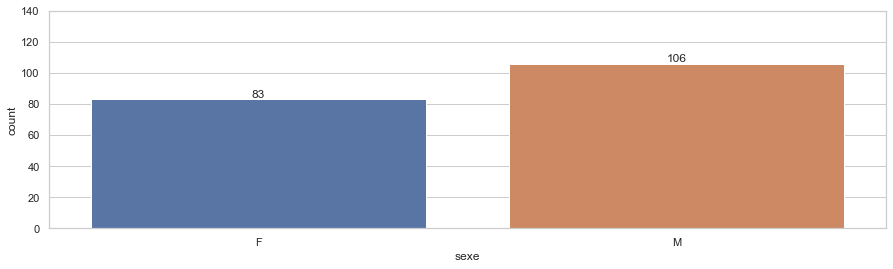

In [134]:
ax = sns.countplot(x="sexe", data=plotDataframeWithNaN(df, "sexe"))
ax.bar_label(ax.containers[0])
ax.set_ylim([0, 140])
plt.show()

### `compte_verifie`

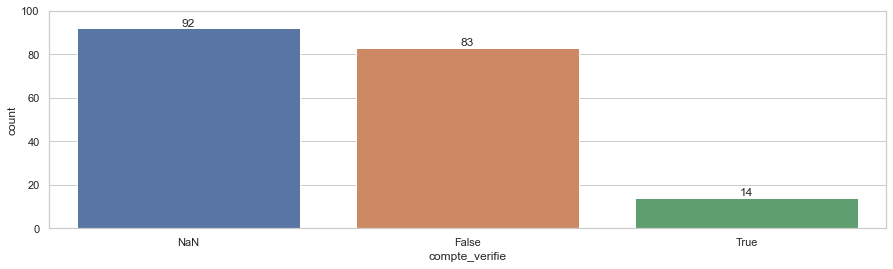

In [135]:
ax = sns.countplot(x="compte_verifie", data=plotDataframeWithNaN(df, "compte_verifie"))
ax.bar_label(ax.containers[0])
ax.set_ylim([0, 100])
plt.show()

### `sortant`

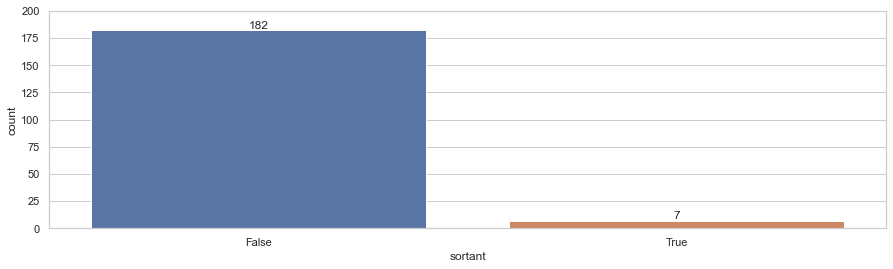

In [136]:
ax = sns.countplot(x="sortant", data=plotDataframeWithNaN(df, "sortant"))
ax.bar_label(ax.containers[0])
ax.set_ylim([0, 200])
plt.show()

### `dissident`

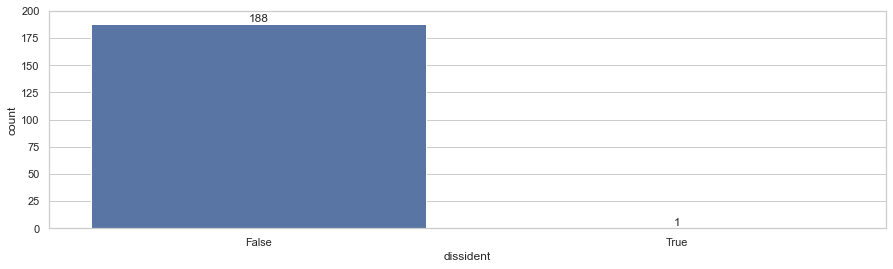

In [137]:
ax = sns.countplot(x="dissident", data=plotDataframeWithNaN(df, "dissident"))
ax.bar_label(ax.containers[0])
ax.set_ylim([0, 200])
plt.show()

In [138]:
# Fonction permettant de tracer de multiples colonnes en même temps
    # La classe "0" représente énormément de valeurs. Elle n'est pas tracée pour pouvoir visualiser les autres graphes.
warnings.filterwarnings('ignore')

def subplotsFromColumns(columnsToPlot, typeAnalyse, nbTweetsStat):
    
    sns.set(rc={'figure.figsize':(15,4)})
    
    df1 = df[df[eachColumn]!=0][eachColumn]
    ax = sns.ecdfplot(df1, stat="count", complementary=True) 

    xlabel = ""
    ylabel = ""
    if typeAnalyse=="nb_tweets":
        xmax = 400
        intervalle = 50
        xlabel = "Nombre de Tweets"
        ylabel = "Nombre de comptes ayant posté + de x Tweets" 
        print("\n", eachColumn," - Nombre de comptes ayant posté + de",nbTweetsStat,"Tweets sur la période :", sum(df[eachColumn]>nbTweetsStat))
    if typeAnalyse=="sum_likes":
        xmax = 3000
        intervalle = 100
        xlabel = "Nombre de likes"
        ylabel = "Nombre de comptes ayant au total + de x likes" 
        print(eachColumn," - Nombre de comptes ayant rassemblé au total + de",nbTweetsStat,"likes sur la période :", sum(df[eachColumn]>nbTweetsStat))
    if typeAnalyse=="max_likes":
        xmax = 1000
        intervalle = 100
        xlabel = "Nombre de likes"
        ylabel = "Nombre de comptes dont le Tweet le + populaire a rassemlé + de x likes" 
        print(eachColumn," - Nombre de comptes dont le Tweet ayant rassemblé le + de likes est supérieur à",nbTweetsStat,":", sum(df[eachColumn]>nbTweetsStat))
    if typeAnalyse=="retweets":
        xmax = 5000
        intervalle = 500
        xlabel = "Nombre de retweets"
        ylabel = "Nombre de comptes ayant au total + de x retweets" 
        print(eachColumn," - Nombre de comptes ayant rassemblé au total + de",nbTweetsStat,"retweets sur la période :", sum(df[eachColumn]>nbTweetsStat))

    ax.set_xlabel(xlabel, fontsize = 12)
    ax.set_ylabel(ylabel, fontsize = 12)
    ax.set_xticks(range(0,xmax, intervalle))
    ax.set(xlim=(0, xmax))
    ax.set(ylim=(0, 50))
    
    plt.show()

### `nb_tweets`


 nb_tweets_elec_period  - Nombre de comptes ayant posté + de 100 Tweets sur la période : 30


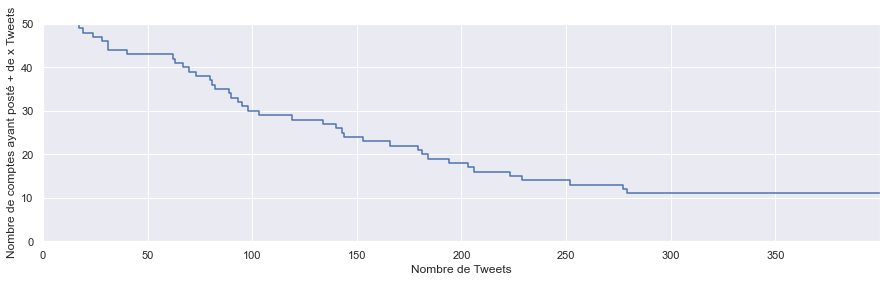


 nb_tweets_reserve_period  - Nombre de comptes ayant posté + de 100 Tweets sur la période : 16


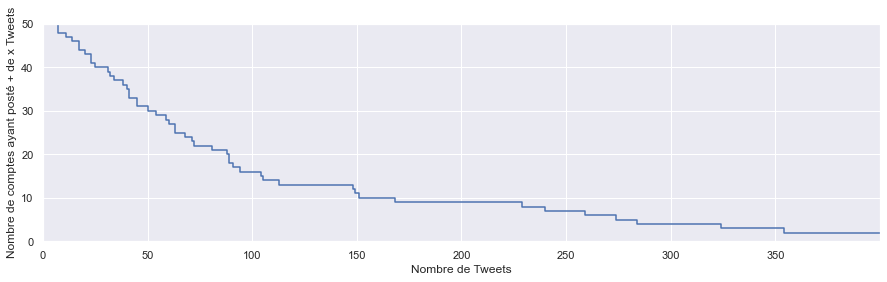


 nb_tweets_last_week  - Nombre de comptes ayant posté + de 100 Tweets sur la période : 6


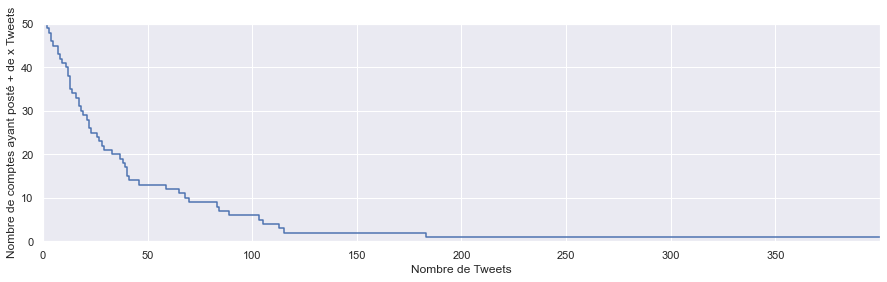

In [139]:
columnsToPlot = ["nb_tweets_elec_period", "nb_tweets_reserve_period", "nb_tweets_last_week"]
for eachColumn in columnsToPlot:
    subplotsFromColumns(columnsToPlot, "nb_tweets", 100)

### `sum_likes`

sum_likes_elec_period  - Nombre de comptes ayant rassemblé au total + de 400 likes sur la période : 25


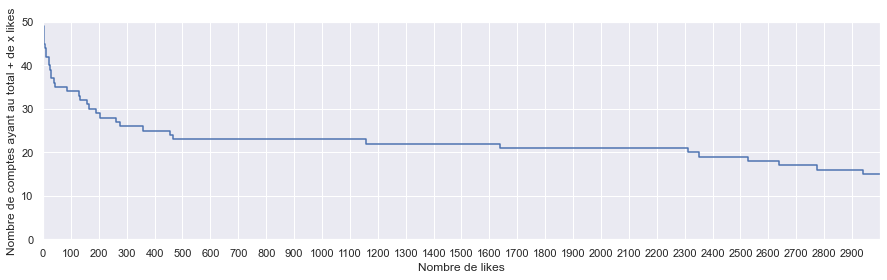

sum_likes_reserve_period  - Nombre de comptes ayant rassemblé au total + de 400 likes sur la période : 23


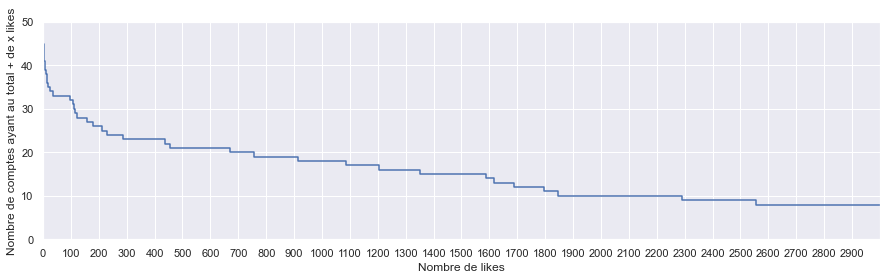

sum_likes_last_week  - Nombre de comptes ayant rassemblé au total + de 400 likes sur la période : 16


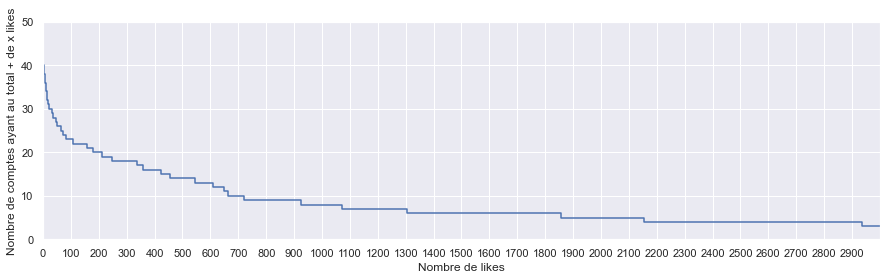

In [140]:
columnsToPlot = ["sum_likes_elec_period", "sum_likes_reserve_period", "sum_likes_last_week"]

for eachColumn in columnsToPlot:
    subplotsFromColumns(eachColumn, "sum_likes", 400)

### `max_likes`

max_likes_elec_period  - Nombre de comptes dont le Tweet ayant rassemblé le + de likes est supérieur à 15 : 31


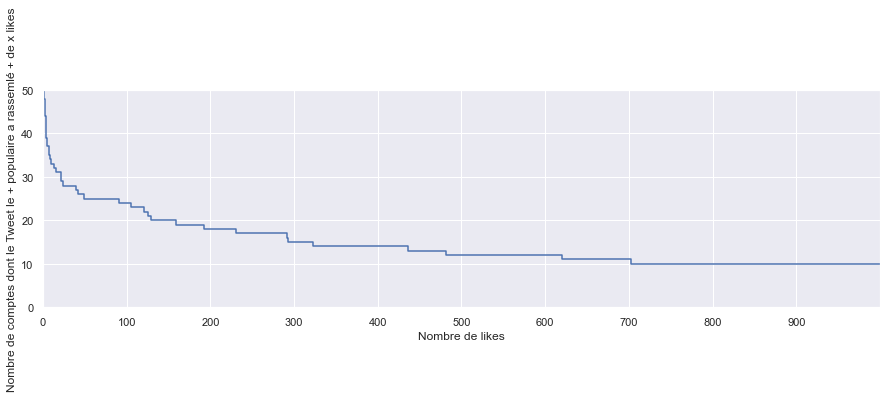

max_likes_reserve_period  - Nombre de comptes dont le Tweet ayant rassemblé le + de likes est supérieur à 15 : 29


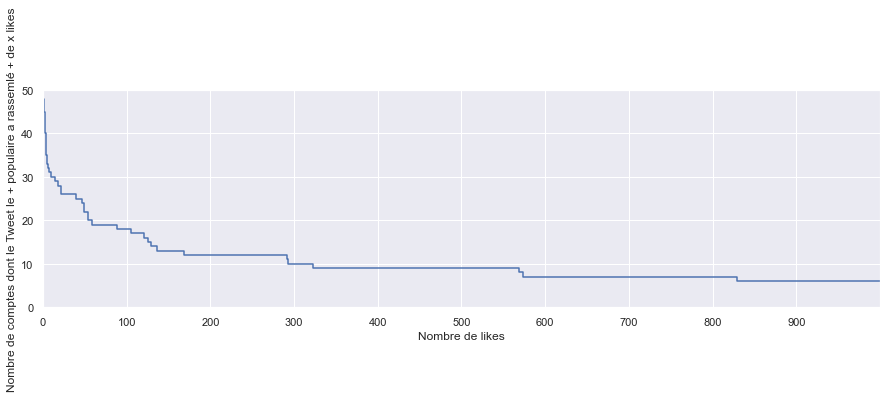

max_likes_last_week  - Nombre de comptes dont le Tweet ayant rassemblé le + de likes est supérieur à 15 : 26


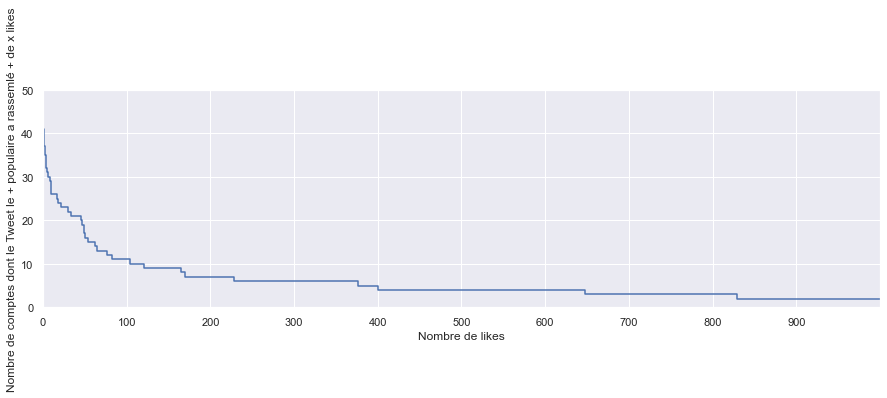

In [141]:
columnsToPlot = ["max_likes_elec_period", "max_likes_reserve_period", "max_likes_last_week"]

for eachColumn in columnsToPlot:
    subplotsFromColumns(eachColumn, "max_likes", 15)

### `retweets`

sum_retweets_elec_period  - Nombre de comptes ayant rassemblé au total + de 40 retweets sur la période : 51


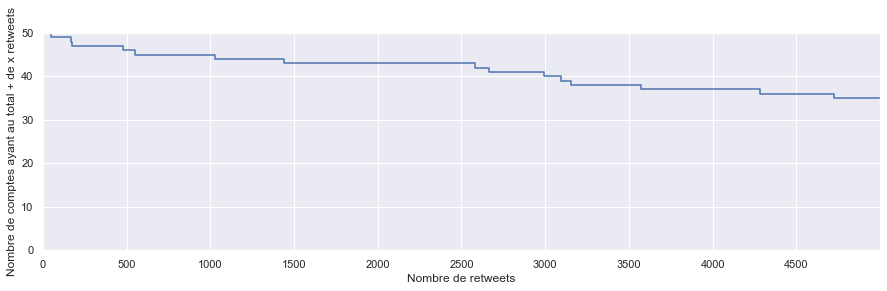

sum_retweets_reserve_period  - Nombre de comptes ayant rassemblé au total + de 40 retweets sur la période : 48


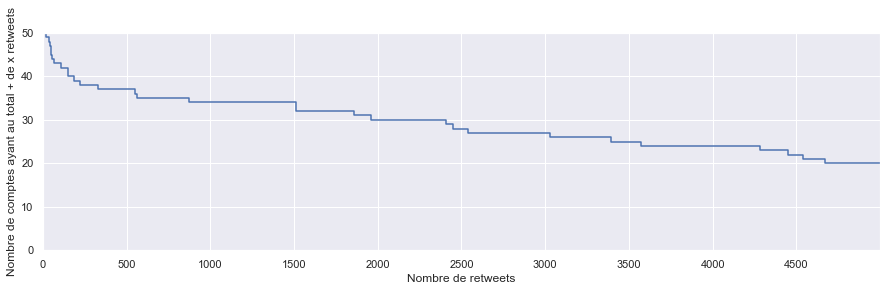

sum_retweets_last_week  - Nombre de comptes ayant rassemblé au total + de 40 retweets sur la période : 43


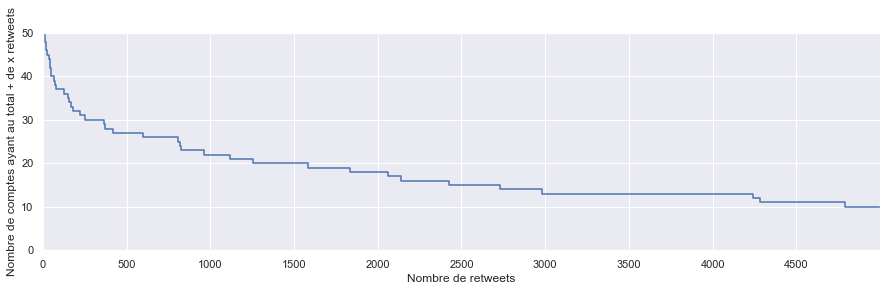

In [142]:
columnsToPlot = ["sum_retweets_elec_period", "sum_retweets_reserve_period", "sum_retweets_last_week"]

for eachColumn in columnsToPlot:
    subplotsFromColumns(eachColumn, "retweets", 40)

### `resultat_election`

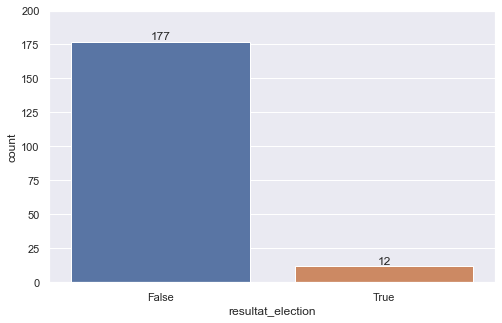

In [143]:
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.countplot(x="resultat_election", data=plotDataframeWithNaN(df, "resultat_election"))
ax.bar_label(ax.containers[0])
ax.set_ylim([0, 200])
plt.show()

### Analyse des valeurs manquantes

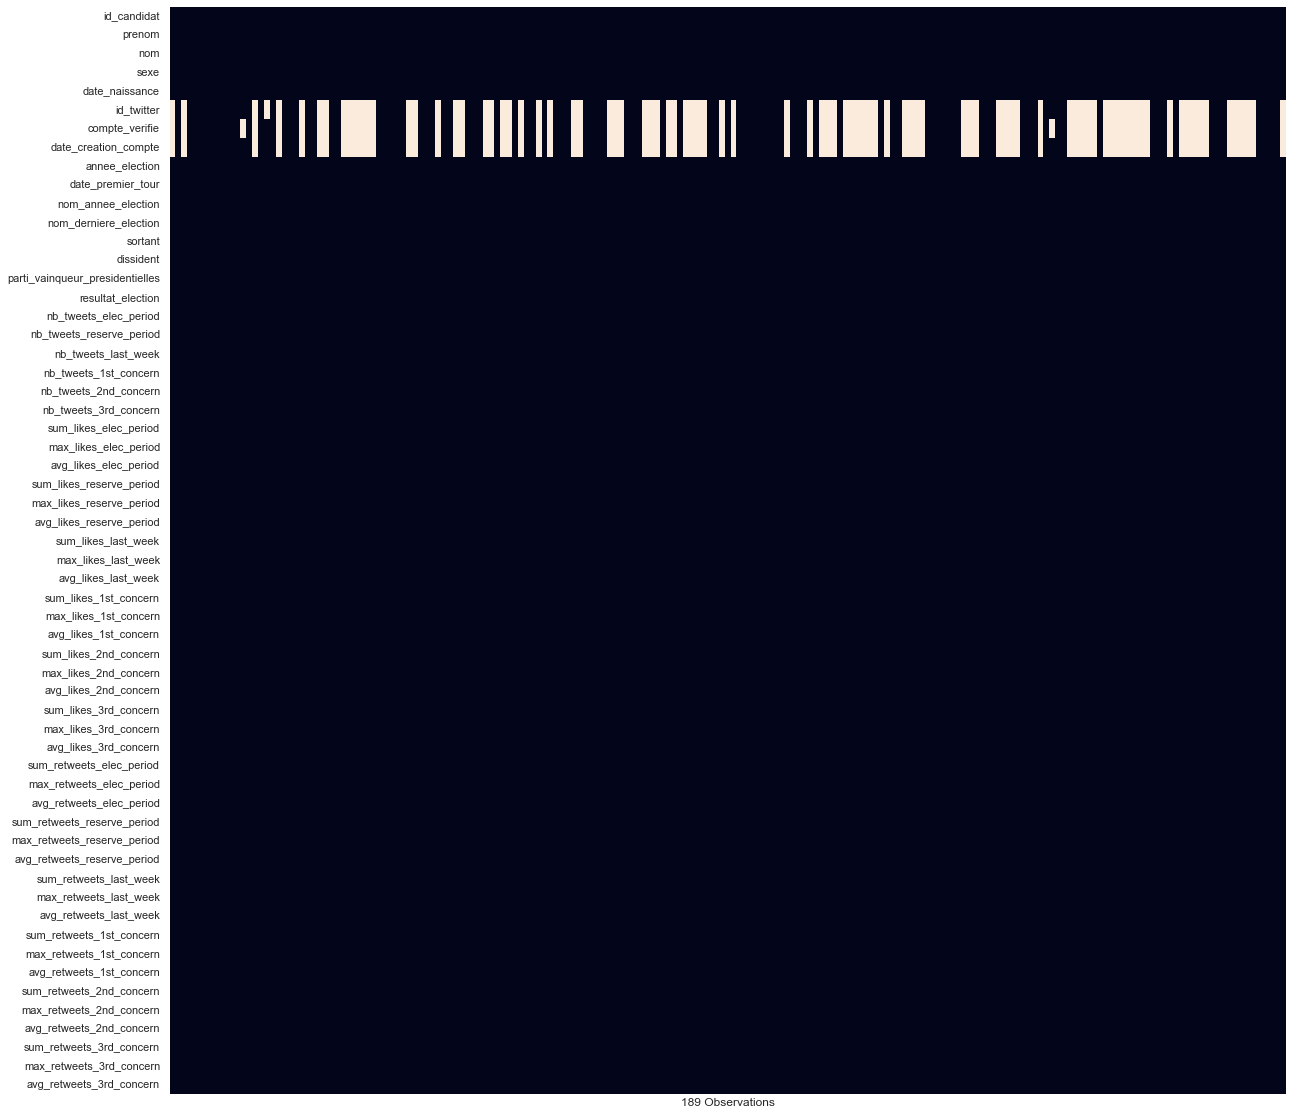

In [144]:
plt.figure(figsize=(20,20))
sns.heatmap(df.isnull().sort_index().T, cbar=False, xticklabels=False)
plt.xlabel(f"{len(df)} Observations")
plt.show()

In [145]:
columnsToPlot = ["nb_tweets_1st_concern", "nb_tweets_2nd_concern", "nb_tweets_3rd_concern"]
subplotsFromColumns(columnsToPlot)

TypeError: subplotsFromColumns() missing 2 required positional arguments: 'typeAnalyse' and 'nbTweetsStat'

## Préparation du Dataset

### Suppression des variables non pertinentes

In [146]:
df.drop([
    "prenom",
    "nom",
    "id_candidat",
    "compte_verifie",
    "nom_annee_election"
],
axis=1,
inplace=True
)

### Constitution des jeux d'entraînement et de test

In [147]:
# Entraînement sur les candidats aux élections législatives précédentes
df_train = df[df["annee_election"]!=2022].copy()
df_train.drop(labels=["annee_election"], axis=1, inplace=True)

# Test sur les candidats aux élections législatives de 2022
df_test = df[df["annee_election"]==2022].copy()
df_test.drop(labels=["annee_election"], axis=1, inplace=True)

# Séparation des variables et de la colonne cible pour chaque jeu
X_train = df_train[df_train.columns.difference(["resultat_election"])]
y_train = df_train["resultat_election"]
X_test = df_test[df_test.columns.difference(["resultat_election"])]
y_test = df_test["resultat_election"]

In [148]:
# Reset des index
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [149]:
def y_details(y_train, y_test):
    y_train_vc = y_train.value_counts().values
    y_test_vc = y_test.value_counts().values
    y_vc = np.stack((y_train_vc, y_test_vc), axis=0)
    y_details = pd.DataFrame(data=y_vc, index=["Train", "Test"], columns=["0", "1"])
    y_details["Total"] = y_details["0"] + y_details["1"]
    return y_details

In [150]:
y_details(y_train, y_test)

,0,1,Total
Train,148,8,156
Test,29,4,33


### Traitement des valeurs manquantes

#### Valeurs manquantes dans le jeu d'entraînement

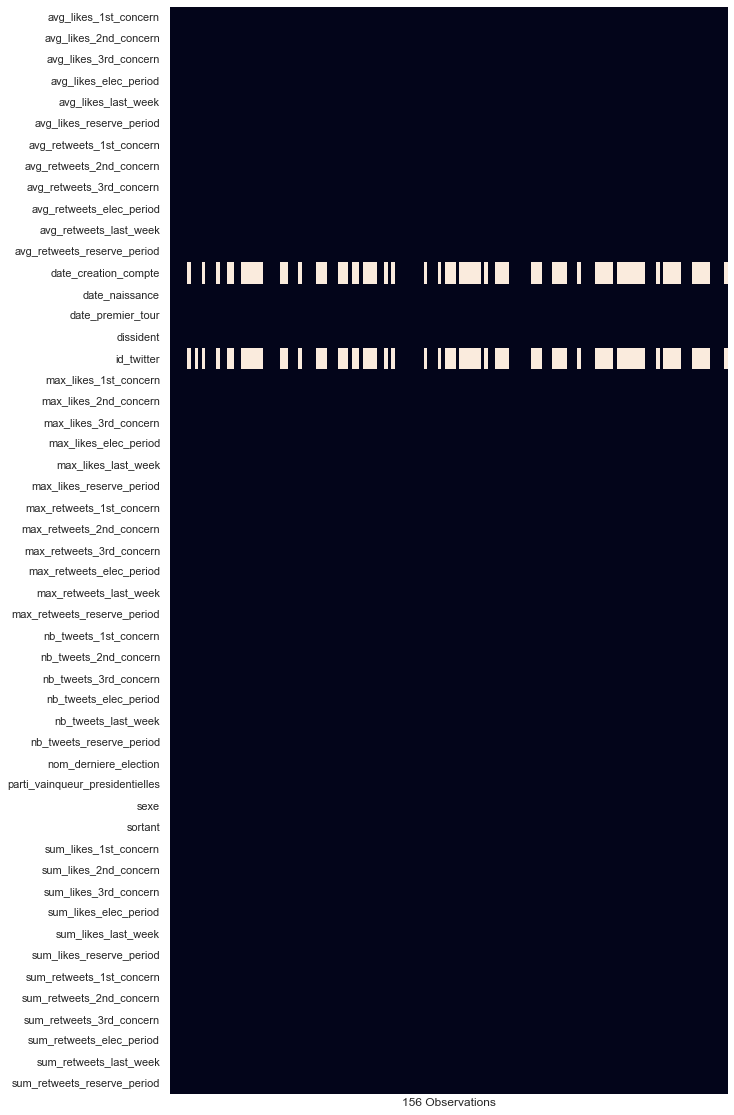

In [151]:
plt.figure(figsize=(10, 20))
sns.heatmap(X_train.isnull().sort_index().T, cbar=False, xticklabels=False)
plt.xlabel(f"{len(X_train)} Observations")
plt.show()

#### Valeurs manquantes dans le jeu de test

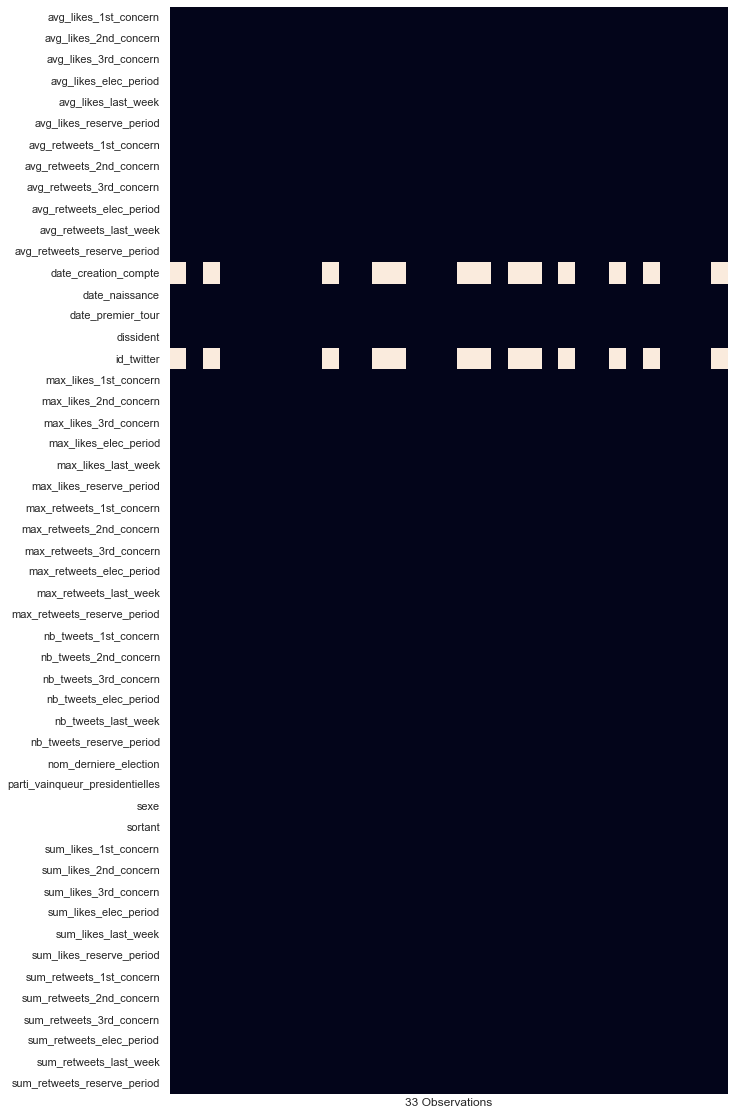

In [152]:
plt.figure(figsize=(10, 20))
sns.heatmap(X_test.isnull().sort_index().T, cbar=False, xticklabels=False)
plt.xlabel(f"{len(X_test)} Observations")
plt.show()

### Feature engineering

#### Création d'une colonne `âge`

In [153]:
today = date.today()

# Jeu d'entraînement
X_train["age"] = X_train["date_naissance"].apply(lambda x: today.year - x.year - ((today.month, today.day) < (x.month, x.day)))
X_train.drop(labels=["date_naissance"], axis=1, inplace=True)

# Jeu de test
X_test["age"] = X_test["date_naissance"].apply(lambda x: today.year - x.year - ((today.month, today.day) < (x.month, x.day)))
X_test.drop(labels=["date_naissance"], axis=1, inplace=True)

#### Création d'une colonne `compte_twitter` booléenne

In [154]:
# Jeu d'entraînement
X_train["compte_twitter"] = X_train["id_twitter"].isna()
X_train.drop(labels=["id_twitter"], axis=1, inplace=True)

# Jeu de test
X_test["compte_twitter"] = X_test["id_twitter"].isna()
X_test.drop(labels=["id_twitter"], axis=1, inplace=True)

#### Création d'une colonne `xp_twitter`

In [155]:
# Jeu d'entraînement
X_train["xp_twitter"] = X_train["date_premier_tour"] - X_train["date_creation_compte"]
X_train["xp_twitter"] = X_train["xp_twitter"].dt.days
X_train["xp_twitter"] = X_train["xp_twitter"].apply(lambda x: 0 if x < 0 or pd.isna(x) else x)
X_train.drop(labels=["date_premier_tour", "date_creation_compte"], axis=1, inplace=True)

# Jeu de test
X_test["xp_twitter"] = X_test["date_premier_tour"] - X_test["date_creation_compte"]
X_test["xp_twitter"] = X_test["xp_twitter"].dt.days
X_test["xp_twitter"] = X_test["xp_twitter"].apply(lambda x: 0 if x < 0 or pd.isna(x) else x)
X_test.drop(labels=["date_premier_tour", "date_creation_compte"], axis=1, inplace=True)

### Conversion des types des colonnes

In [156]:
# Jeu d'entraînement
X_train.loc[:, X_train.dtypes=="object"] = X_train.select_dtypes(['object']).apply(lambda x: x.astype('category'))
y_train = y_train.astype('int')

# Jeu de test
X_test.loc[:, X_test.dtypes=="object"] = X_test.select_dtypes(['object']).apply(lambda x: x.astype('category'))
y_test = y_test.astype('int')

### Création du preprocessor

In [157]:
# Opérations de transformation pour les variables catégorielles
categorical_transformer = OneHotEncoder(handle_unknown="ignore", drop="first")

# Variables catégorielles
categorical_features = X_train.select_dtypes(["category"]).columns

# Instantiation du pré-processeur
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features)
    ],
    remainder="passthrough"
)

### Vérification des jeux finaux

In [158]:
# Vérification de la sortie du preprocessor pour le jeu d'entraînement
features = preprocessor.fit(X_train).get_feature_names_out()
features = [feature.split("__")[1] for feature in features]
pd.DataFrame(preprocessor.transform(X_train), columns=features).head(5)

,nom_derniere_election_DSV,nom_derniere_election_DVD,nom_derniere_election_DVG,nom_derniere_election_DXD,nom_derniere_election_DXG,nom_derniere_election_ECO,nom_derniere_election_ENS,nom_derniere_election_LR,nom_derniere_election_MDM,nom_derniere_election_NCE,nom_derniere_election_NUPES,nom_derniere_election_PRV,nom_derniere_election_RDG,nom_derniere_election_RN,nom_derniere_election_UDI,sexe_M,avg_likes_1st_concern,avg_likes_2nd_concern,avg_likes_3rd_concern,avg_likes_elec_period,avg_likes_last_week,avg_likes_reserve_period,avg_retweets_1st_concern,avg_retweets_2nd_concern,avg_retweets_3rd_concern,avg_retweets_elec_period,avg_retweets_last_week,avg_retweets_reserve_period,dissident,max_likes_1st_concern,max_likes_2nd_concern,max_likes_3rd_concern,max_likes_elec_period,max_likes_last_week,max_likes_reserve_period,max_retweets_1st_concern,max_retweets_2nd_concern,max_retweets_3rd_concern,max_retweets_elec_period,max_retweets_last_week,max_retweets_reserve_period,nb_tweets_1st_concern,nb_tweets_2nd_concern,nb_tweets_3rd_concern,nb_tweets_elec_period,nb_tweets_last_week,nb_tweets_reserve_period,parti_vainqueur_presidentielles,sortant,sum_likes_1st_concern,sum_likes_2nd_concern,sum_likes_3rd_concern,sum_likes_elec_period,sum_likes_last_week,sum_likes_reserve_period,sum_retweets_1st_concern,sum_retweets_2nd_concern,sum_retweets_3rd_concern,sum_retweets_elec_period,sum_retweets_last_week,sum_retweets_reserve_period,age,compte_twitter,xp_twitter
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,False,0,0,0,0,0,0,0,0,0,0,0,0,26,False,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1724.0,398.0,2842.0,False,0.0,0.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,193333.0,9947.0,193333.0,0,0,0,119,26,72,0,False,0,0,0,20,0,11,0,0,0,205180,10358,204593,65,False,2993.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,False,0.0,0.0,0.0,7.0,3.0,3.0,0.0,0.0,0.0,72.0,7.0,21.0,0,0,0,153,17,34,0,False,0,0,0,43,9,15,0,0,0,476,12,52,31,False,680.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,False,0,0,0,0,0,0,0,0,0,0,0,0,71,False,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,33.0,12.0,10.0,False,0.0,0.0,0.0,7.0,2.0,7.0,0.0,0.0,0.0,2327.0,146.0,146.0,0,0,0,80,13,23,0,False,0,0,0,87,10,24,0,0,0,2663,150,222,56,False,2871.0


In [159]:
pd.DataFrame(preprocessor.transform(X_train), columns=features).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 64 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   nom_derniere_election_DSV        156 non-null    object
 1   nom_derniere_election_DVD        156 non-null    object
 2   nom_derniere_election_DVG        156 non-null    object
 3   nom_derniere_election_DXD        156 non-null    object
 4   nom_derniere_election_DXG        156 non-null    object
 5   nom_derniere_election_ECO        156 non-null    object
 6   nom_derniere_election_ENS        156 non-null    object
 7   nom_derniere_election_LR         156 non-null    object
 8   nom_derniere_election_MDM        156 non-null    object
 9   nom_derniere_election_NCE        156 non-null    object
 10  nom_derniere_election_NUPES      156 non-null    object
 11  nom_derniere_election_PRV        156 non-null    object
 12  nom_derniere_election_RDG        156

In [161]:
pd.DataFrame(preprocessor.transform(X_test), columns=features).head(5)

,nom_derniere_election_DSV,nom_derniere_election_DVD,nom_derniere_election_DVG,nom_derniere_election_DXD,nom_derniere_election_DXG,nom_derniere_election_ECO,nom_derniere_election_ENS,nom_derniere_election_LR,nom_derniere_election_MDM,nom_derniere_election_NCE,nom_derniere_election_NUPES,nom_derniere_election_PRV,nom_derniere_election_RDG,nom_derniere_election_RN,nom_derniere_election_UDI,sexe_M,avg_likes_1st_concern,avg_likes_2nd_concern,avg_likes_3rd_concern,avg_likes_elec_period,avg_likes_last_week,avg_likes_reserve_period,avg_retweets_1st_concern,avg_retweets_2nd_concern,avg_retweets_3rd_concern,avg_retweets_elec_period,avg_retweets_last_week,avg_retweets_reserve_period,dissident,max_likes_1st_concern,max_likes_2nd_concern,max_likes_3rd_concern,max_likes_elec_period,max_likes_last_week,max_likes_reserve_period,max_retweets_1st_concern,max_retweets_2nd_concern,max_retweets_3rd_concern,max_retweets_elec_period,max_retweets_last_week,max_retweets_reserve_period,nb_tweets_1st_concern,nb_tweets_2nd_concern,nb_tweets_3rd_concern,nb_tweets_elec_period,nb_tweets_last_week,nb_tweets_reserve_period,parti_vainqueur_presidentielles,sortant,sum_likes_1st_concern,sum_likes_2nd_concern,sum_likes_3rd_concern,sum_likes_elec_period,sum_likes_last_week,sum_likes_reserve_period,sum_retweets_1st_concern,sum_retweets_2nd_concern,sum_retweets_3rd_concern,sum_retweets_elec_period,sum_retweets_last_week,sum_retweets_reserve_period,age,compte_twitter,xp_twitter
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,False,0,0,0,0,0,0,0,0,0,0,0,0,48,True,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,False,0,0,0,0,0,0,0,0,0,0,0,0,63,False,1138.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,False,0,0,0,0,0,0,0,0,0,0,0,0,44,True,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,45.0,0.0,7.0,28.0,25.0,27.0,27.0,0.0,0.0,134.0,93.0,229.0,False,45.0,0.0,7.0,291.0,62.0,291.0,27.0,0.0,0.0,8186.0,963.0,8186.0,1,0,1,90,17,45,0,False,45,0,7,2526,424,1204,27,0,0,12063,1583,10312,41,False,924.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,27.0,50.0,0.0,32.0,16.0,26.0,15.0,21.0,0.0,51.0,37.0,68.0,True,27.0,101.0,0.0,2175.0,228.0,1803.0,15.0,43.0,0.0,6664.0,1308.0,6664.0,1,4,0,641,115,274,0,True,27,199,0,20783,1857,7198,15,83,0,32810,4240,18595,35,False,3510.0


In [163]:
pd.DataFrame(preprocessor.transform(X_test), columns=features).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 64 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   nom_derniere_election_DSV        33 non-null     object
 1   nom_derniere_election_DVD        33 non-null     object
 2   nom_derniere_election_DVG        33 non-null     object
 3   nom_derniere_election_DXD        33 non-null     object
 4   nom_derniere_election_DXG        33 non-null     object
 5   nom_derniere_election_ECO        33 non-null     object
 6   nom_derniere_election_ENS        33 non-null     object
 7   nom_derniere_election_LR         33 non-null     object
 8   nom_derniere_election_MDM        33 non-null     object
 9   nom_derniere_election_NCE        33 non-null     object
 10  nom_derniere_election_NUPES      33 non-null     object
 11  nom_derniere_election_PRV        33 non-null     object
 12  nom_derniere_election_RDG        33 no

## Modélisation

### Fonction Custom

In [164]:
def plot_features_importance(grid_search):
    raw_features_name = grid_search.best_estimator_.named_steps["preprocessor"].get_feature_names_out()
    formatted_features_name = [raw_feature_name.split("__")[-1] for raw_feature_name in raw_features_name]
    features_importance = np.around(grid_search.best_estimator_.named_steps["model"].feature_importances_, decimals=2)
    fi_df = pd.DataFrame(data={"name": formatted_features_name, "importance": features_importance})
    fig, ax = plt.subplots(figsize=(20,40))
    sns.color_palette("pastel")
    sns.barplot(x="importance", y="name", data=fi_df, orient="h")
    plt.xlabel("Relative Importance")
    plt.ylabel("Feature")
    plt.show()

### Définition des métriques

In [165]:
def classification_metrics(y, y_pred):
    return pd.DataFrame(
        {
            "accuracy_score": metrics.accuracy_score(y_true=y, y_pred=y_pred),
            "f1_score": metrics.f1_score(y_true=y, y_pred=y_pred),
            "precision_score": metrics.precision_score(
                y_true=y, y_pred=y_pred),
            "recall_score": metrics.recall_score(y_true=y, y_pred=y_pred)
        },
        index=[0])

### Decision Tree

In [166]:
dt_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", DecisionTreeClassifier()),
])

In [167]:
dt_params_grid = {
    "model__splitter": ["best", "random"],
    "model__max_depth": [2, 3, 5, 10, 15, 20, 30],
    "model__min_samples_split": [5, 10, 20, 30, 40],
    "model__min_samples_leaf": [1, 2, 5, 10],
    "model__max_features": ["auto", "sqrt", "log2"],
    "model__class_weight": ["balanced"]
}

pp.pprint(dt_params_grid)

total_conf = 1
for _, value in dt_params_grid.items():
    if isinstance(value, list):
        total_conf *= len(value)

print("\n")
print(f"Nombre de configurations à tester : {total_conf}")

{   'model__class_weight': ['balanced'],
    'model__max_depth': [2, 3, 5, 10, 15, 20, 30],
    'model__max_features': ['auto', 'sqrt', 'log2'],
    'model__min_samples_leaf': [1, 2, 5, 10],
    'model__min_samples_split': [5, 10, 20, 30, 40],
    'model__splitter': ['best', 'random']}


Nombre de configurations à tester : 840


In [168]:
dt_grid_search = GridSearchCV(
                                    estimator=dt_pipeline, 
                                    param_grid=dt_params_grid,
                                    cv=5,
                                    scoring="f1",
                                    verbose=1,
                                    n_jobs=6
                                )

dt_grid_search.fit(X_train, y_train)
print(f"Best score: {round(dt_grid_search.best_score_, 2)}")
pp.pprint(dt_grid_search.best_params_)

Fitting 5 folds for each of 840 candidates, totalling 4200 fits


/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python

/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python

/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python

/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python

/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python

/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python

/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python

/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python

/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python

/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python

/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python

/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python

/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python

/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python

/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python

/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python

/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python

Best score: 0.47
{   'model__class_weight': 'balanced',
    'model__max_depth': 20,
    'model__max_features': 'auto',
    'model__min_samples_leaf': 2,
    'model__min_samples_split': 30,
    'model__splitter': 'random'}


/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python

In [169]:
pred_train = dt_grid_search.predict(X_train)
pred_test = dt_grid_search.predict(X_test)

print("Classification metrics for train data")
print(classification_metrics(y_train, pred_train))
print("\n")
print("Classification metrics for test data")
print(classification_metrics(y_test, pred_test))

Classification metrics for train data
   accuracy_score  f1_score  precision_score  recall_score
0        0.884615    0.4375         0.291667         0.875


Classification metrics for test data
   accuracy_score  f1_score  precision_score  recall_score
0        0.606061  0.133333         0.090909          0.25


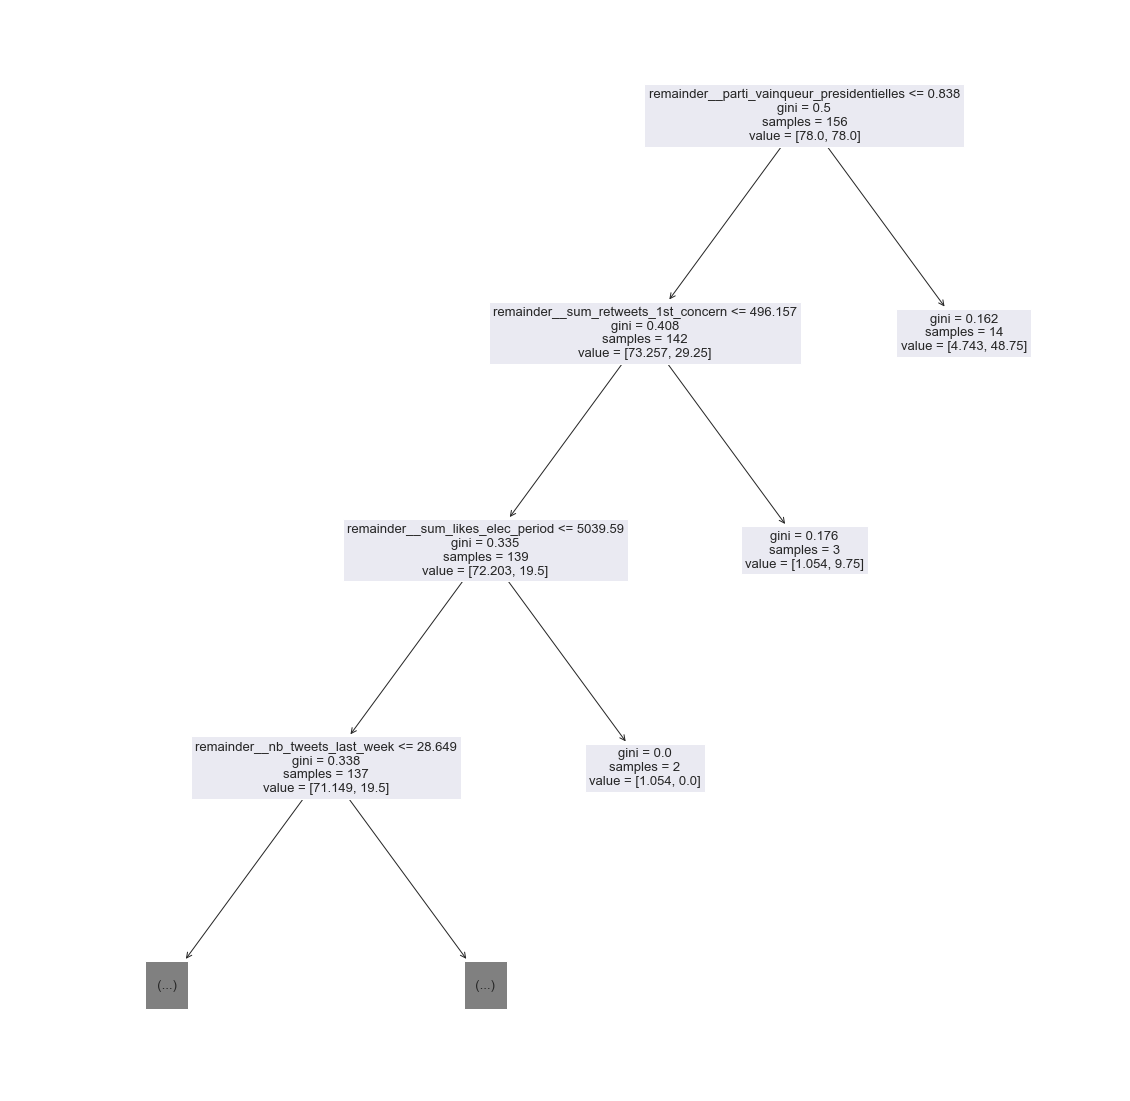

In [170]:
feature_names = dt_grid_search.best_estimator_.named_steps["preprocessor"].get_feature_names_out().tolist()

fig, ax = plt.subplots(figsize=(20, 20))
plot_tree(dt_grid_search.best_estimator_["model"], feature_names=feature_names, ax=ax, max_depth=3)
plt.show()

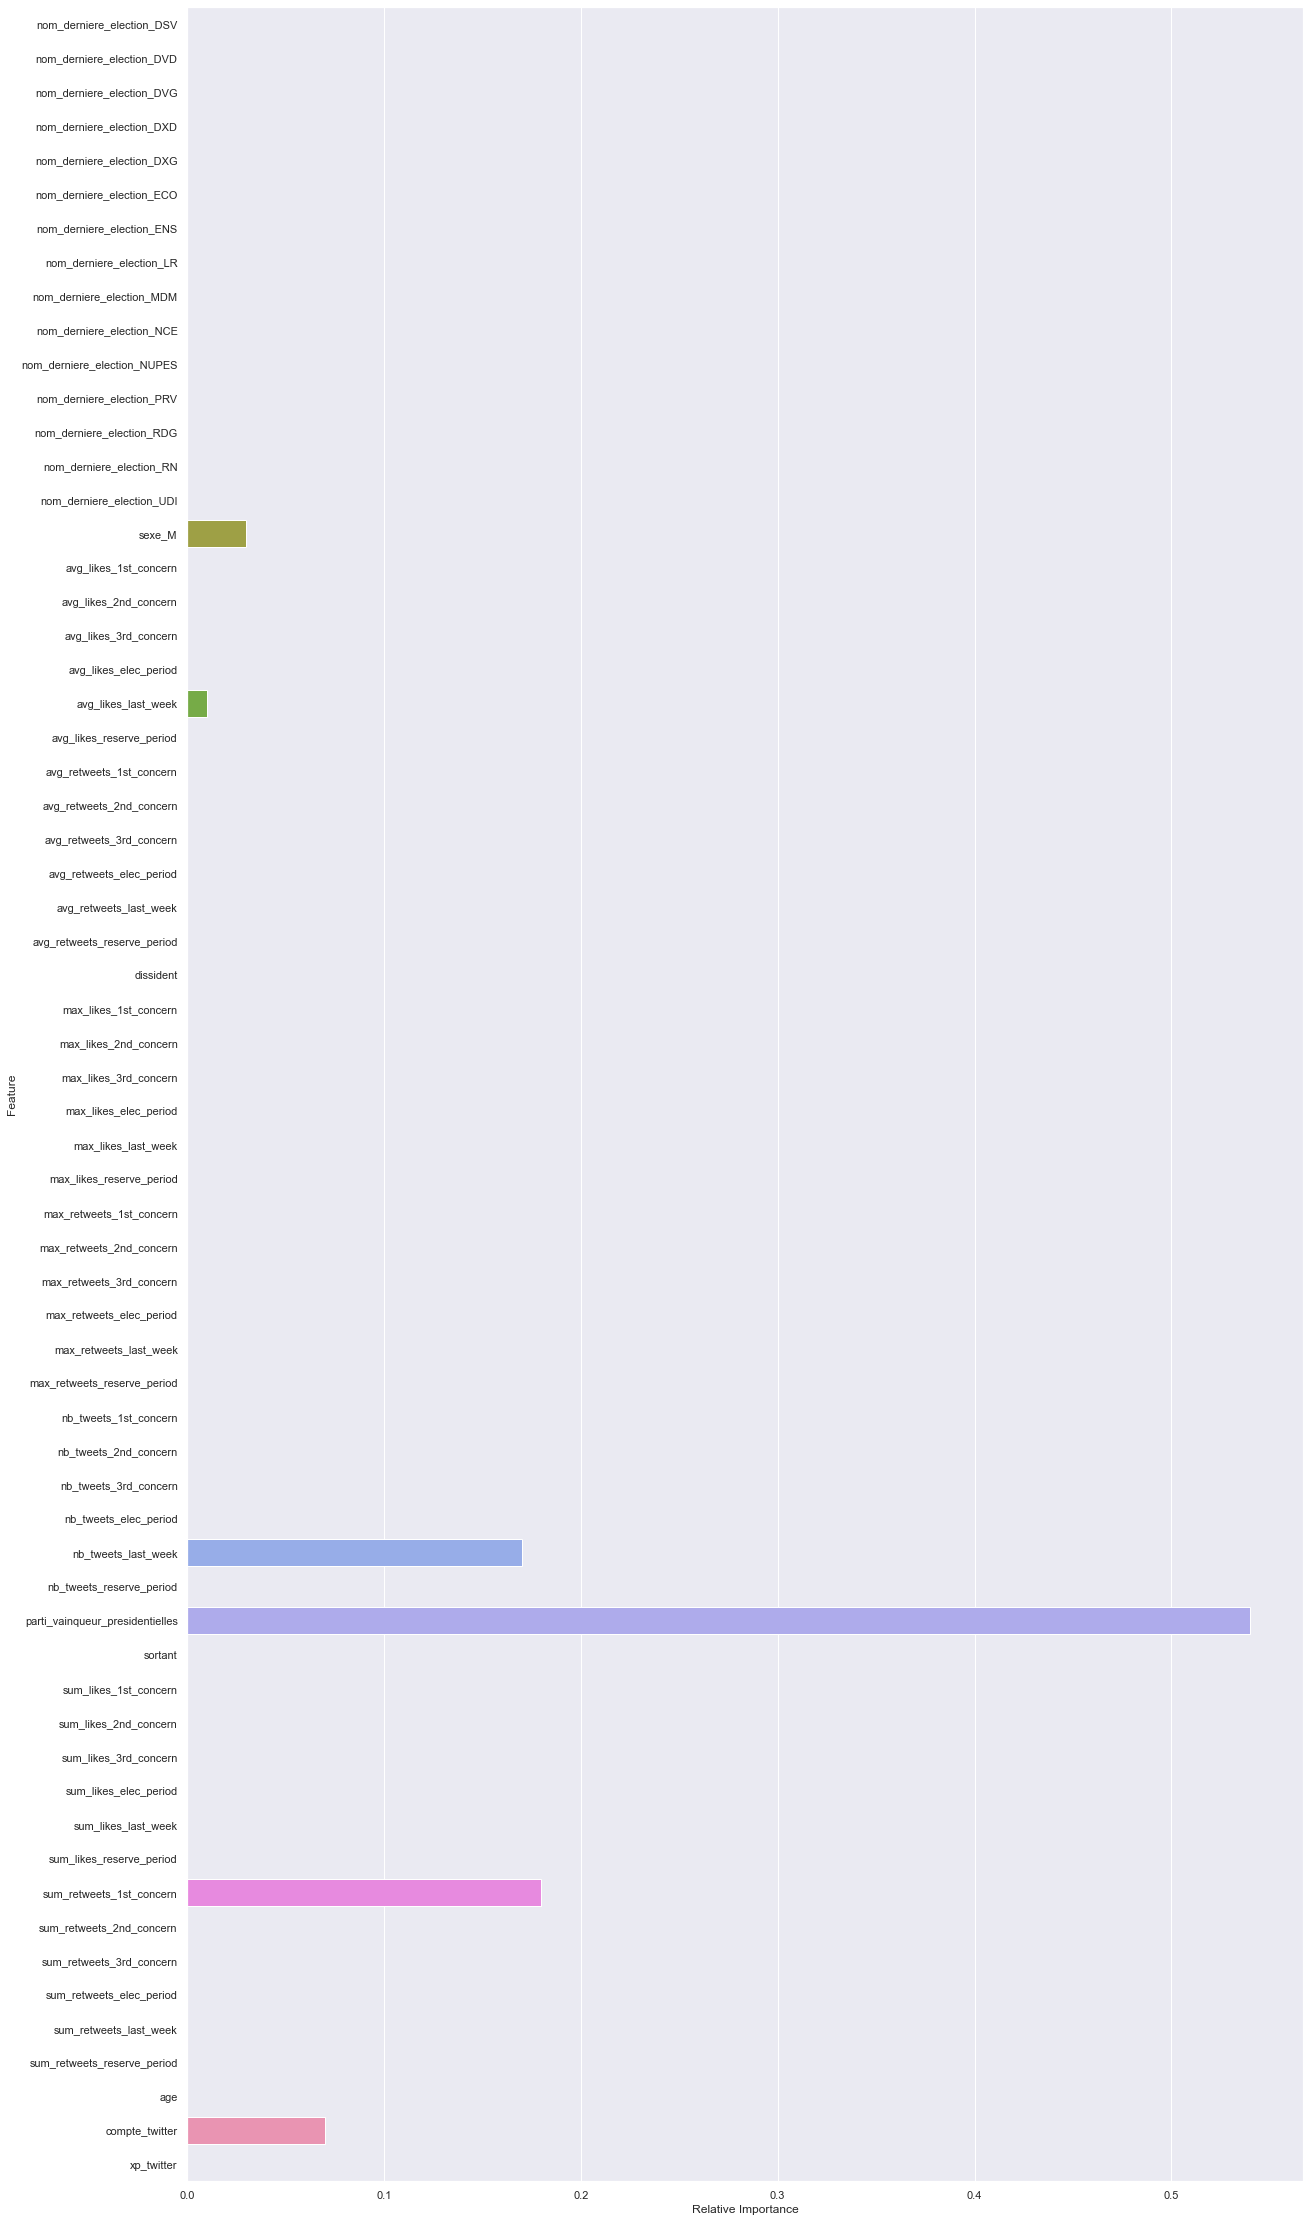

In [172]:
plot_features_importance(dt_grid_search)

### RandomForestClassifier

In [173]:
rf_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestClassifier()),
])


In [174]:
rf_params_grid = {
    "model__n_estimators": [10, 100, 200, 300, 400], 
    "model__max_features": [2, 3, 5, 7, 9], 
    "model__min_samples_split": [2, 4, 6, 8],
    "model__max_features": [5, 10, 15, 20],
    "model__bootstrap": [True, False]

}
pp.pprint(rf_params_grid)

total_conf = 1
for _, value in rf_params_grid.items():
    if isinstance(value, list):
        total_conf *= len(value)

print("\n")
print(f"Nombre de configurations à tester : {total_conf}")

{   'model__bootstrap': [True, False],
    'model__max_features': [5, 10, 15, 20],
    'model__min_samples_split': [2, 4, 6, 8],
    'model__n_estimators': [10, 100, 200, 300, 400]}


Nombre de configurations à tester : 160


In [175]:
rf_grid_search = GridSearchCV(
                                    estimator=rf_pipeline, 
                                    param_grid=rf_params_grid,
                                    cv=5,
                                    scoring="f1",
                                    verbose=1,
                                    n_jobs=6
                                )

rf_grid_search.fit(X_train, y_train)
print(f"Best score: {round(rf_grid_search.best_score_, 2)}")
pp.pprint(rf_grid_search.best_params_)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python

/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python

/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python

/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python

/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python

/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python

/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python

/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python

/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python

/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python

/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python

/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python

/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/antoine/Dev/miniconda3/lib/python

Best score: 0.27
{   'model__bootstrap': False,
    'model__max_features': 20,
    'model__min_samples_split': 4,
    'model__n_estimators': 10}


In [176]:
pred_train = rf_grid_search.predict(X_train)
pred_test = rf_grid_search.predict(X_test)

print("Classification metrics for train data")
print(classification_metrics(y_train, pred_train))
print("\n")
print("Classification metrics for test data")
print(classification_metrics(y_test, pred_test))

Classification metrics for train data
   accuracy_score  f1_score  precision_score  recall_score
0         0.99359  0.933333              1.0         0.875


Classification metrics for test data
   accuracy_score  f1_score  precision_score  recall_score
0        0.787879  0.533333         0.363636           1.0


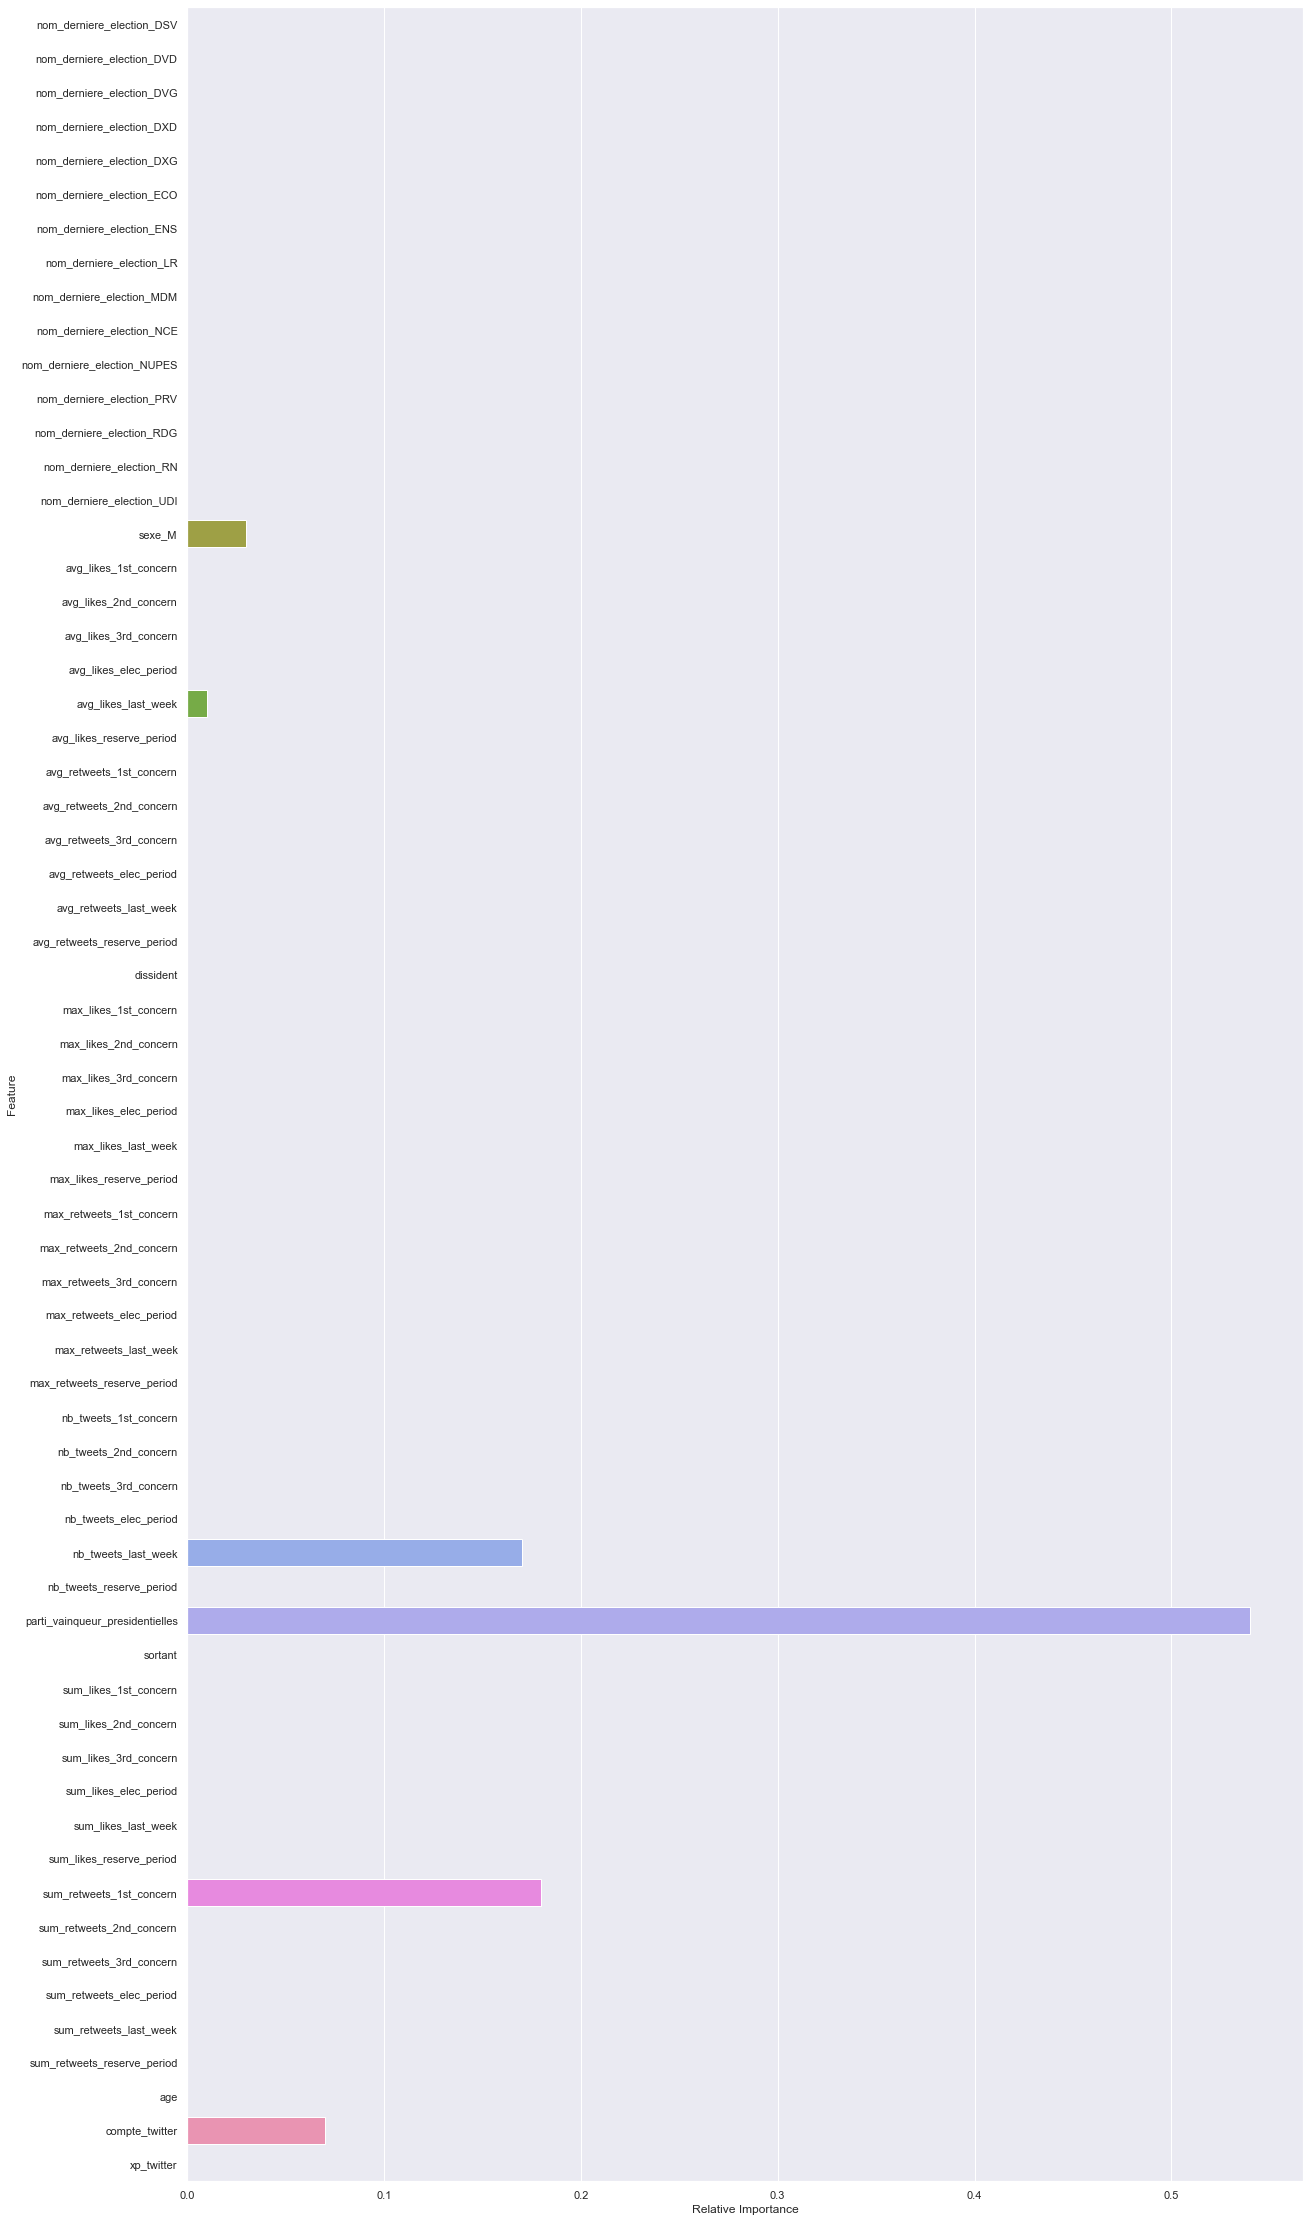

In [177]:
plot_features_importance(dt_grid_search)